In [1]:
# Import the required libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Logistic Regression Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as lr
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

# Enable the Matplotlib property to allow diagrams to display in Jupyter Notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
# Read the CSV file into a Pandas DataFrame
# Set the index using the Ticker column
df_feature = pd.read_csv(
    Path("../Data/Feature_Engineering_CM.csv"), 
    index_col="Date"
)

# Review the DataFrame
display(df_feature.head())
display(df_feature.columns)

,Open,High,Low,Close,Adj Close,Volume,Mid_hl,Mid_oc,Mid_hloc,Close_in_range,...,SMA_Signal_8_20Day_Mhloc,high_slope,high_intercept,mid_hl_slope,mid_hl_intercept,mid_oc_slope,mid_oc_intercept,low_slope,low_intercept,trend_10day
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02 00:00:00-05:00,45.375000,45.415001,44.759998,45.035000,29.094713,1332600,45.087500,45.205000,45.146250,0.419848,...,1,-0.084637,45.112001,-0.080121,44.848167,-0.082909,44.894000,-0.075606,44.584333,0.0
2014-01-03 00:00:00-05:00,44.950001,44.970001,44.639999,44.730000,28.897669,1590800,44.805000,44.840000,44.822500,0.272726,...,1,-0.044394,44.793668,-0.042288,44.558334,-0.036303,44.552667,-0.040182,44.322999,0.0
2014-01-06 00:00:00-05:00,44.750000,44.755001,44.310001,44.395000,28.681242,1970800,44.532501,44.572500,44.552501,0.191009,...,1,-0.014152,44.589334,-0.003697,44.310333,-0.002091,44.319000,0.006758,44.031333,0.0
2014-01-07 00:00:00-05:00,44.470001,44.750000,44.169998,44.215000,28.564960,1697800,44.459999,44.342501,44.401250,0.077589,...,1,0.012909,44.436001,0.025424,44.149666,0.029076,44.145833,0.037940,43.863332,1.0
2014-01-08 00:00:00-05:00,44.205002,44.275002,43.889999,44.009998,28.432505,2087200,44.082500,44.107500,44.095000,0.311684,...,1,0.053273,44.234000,0.062182,43.977000,0.053849,44.046833,0.071091,43.719999,1.0


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Mid_hl',
       'Mid_oc', 'Mid_hloc', 'Close_in_range', 'Returns_1Day_Moc',
       'Returns_5Day_Moc', 'Returns_30Day_Moc', 'Returns_1Day_Mhloc',
       'Returns_5Day_Mhloc', 'Returns_30Day_Mhloc', 'Std_Dev_10Day_Moc',
       'Std_Dev_30Day_Moc', 'Std_Dev_10Day_Mhloc', 'Std_Dev_30Day_Mhloc',
       'SMA_Returns_8Day_Mhloc', 'SMA_Returns_20Day_Mhloc',
       'SMA_Delta_8_20Day_Mhloc', 'SMA_Signal_8_20Day_Mhloc', 'high_slope',
       'high_intercept', 'mid_hl_slope', 'mid_hl_intercept', 'mid_oc_slope',
       'mid_oc_intercept', 'low_slope', 'low_intercept', 'trend_10day'],
      dtype='object')

In [4]:
df_feature_1 = df_feature
drop_colums_feature = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Mid_hl', 'Mid_oc', 'Mid_hloc',
                        'high_slope','high_intercept', 'mid_hl_slope', 'mid_hl_intercept', 'mid_oc_slope', 'mid_oc_intercept', 'low_slope', 'low_intercept', 'trend_10day']
df_feature_1 = df_feature_1.dropna()
df_feature_1 = df_feature_1.drop(columns = drop_colums_feature)

# Review the DataFrame
print(f"Shape: {df_feature_1.shape}")
print(f"Columns/Features: {df_feature_1.columns}")
display(df_feature_1.head(10))
display(df_feature_1.tail(10))

Shape: (2218, 15)
Columns/Features: Index(['Close_in_range', 'Returns_1Day_Moc', 'Returns_5Day_Moc',
       'Returns_30Day_Moc', 'Returns_1Day_Mhloc', 'Returns_5Day_Mhloc',
       'Returns_30Day_Mhloc', 'Std_Dev_10Day_Moc', 'Std_Dev_30Day_Moc',
       'Std_Dev_10Day_Mhloc', 'Std_Dev_30Day_Mhloc', 'SMA_Returns_8Day_Mhloc',
       'SMA_Returns_20Day_Mhloc', 'SMA_Delta_8_20Day_Mhloc',
       'SMA_Signal_8_20Day_Mhloc'],
      dtype='object')


,Close_in_range,Returns_1Day_Moc,Returns_5Day_Moc,Returns_30Day_Moc,Returns_1Day_Mhloc,Returns_5Day_Mhloc,Returns_30Day_Mhloc,Std_Dev_10Day_Moc,Std_Dev_30Day_Moc,Std_Dev_10Day_Mhloc,Std_Dev_30Day_Mhloc,SMA_Returns_8Day_Mhloc,SMA_Returns_20Day_Mhloc,SMA_Delta_8_20Day_Mhloc,SMA_Signal_8_20Day_Mhloc
Date,,,,,,,,,,,,,,,
2014-02-13 00:00:00-05:00,0.911109,0.002603,0.017338,-0.020020,0.001215,0.016665,-0.018634,0.521395,0.540651,0.551110,0.543896,0.005983,0.005806,0.000177,0
2014-02-14 00:00:00-05:00,0.595741,0.006998,0.017042,-0.005129,0.007279,0.017847,-0.004351,0.595475,0.530154,0.621355,0.535083,0.004013,0.006016,-0.002004,0
2014-02-18 00:00:00-05:00,0.346150,0.004651,0.023347,0.005497,0.004117,0.022475,0.005808,0.645804,0.540856,0.658973,0.546025,0.004016,0.006044,-0.002028,0
2014-02-19 00:00:00-05:00,0.552935,0.000446,0.020251,0.011163,0.001478,0.019654,0.010726,0.579067,0.558280,0.586950,0.564019,0.003090,0.005995,-0.002905,0
2014-02-20 00:00:00-05:00,0.762498,0.001673,0.016465,0.018251,0.001309,0.015480,0.019078,0.491979,0.580670,0.487986,0.587322,0.002771,0.006005,-0.003234,0
2014-02-21 00:00:00-05:00,0.134147,0.003785,0.017664,0.018986,0.004562,0.018875,0.021989,0.476321,0.609125,0.478918,0.619093,0.002091,0.005907,-0.003816,0
2014-02-24 00:00:00-05:00,0.132228,0.000776,0.011376,0.019547,0.001135,0.012660,0.022137,0.474047,0.636823,0.475152,0.650318,0.002324,0.005724,-0.003400,0
2014-02-25 00:00:00-05:00,0.549296,0.001053,0.007754,0.022295,-0.000636,0.007866,0.020938,0.423507,0.664754,0.418619,0.676933,0.002268,0.004842,-0.002575,0
2014-02-26 00:00:00-05:00,0.397054,0.003321,0.010650,0.022970,0.003515,0.009916,0.022937,0.372085,0.697492,0.370720,0.709012,0.002275,0.004646,-0.002371,0


,Close_in_range,Returns_1Day_Moc,Returns_5Day_Moc,Returns_30Day_Moc,Returns_1Day_Mhloc,Returns_5Day_Mhloc,Returns_30Day_Mhloc,Std_Dev_10Day_Moc,Std_Dev_30Day_Moc,Std_Dev_10Day_Mhloc,Std_Dev_30Day_Mhloc,SMA_Returns_8Day_Mhloc,SMA_Returns_20Day_Mhloc,SMA_Delta_8_20Day_Mhloc,SMA_Signal_8_20Day_Mhloc
Date,,,,,,,,,,,,,,,
2022-12-01 00:00:00-05:00,0.116477,-0.049038,-0.053152,0.043508,-0.048196,-0.054116,0.041644,1.053540,1.701485,1.060034,1.696707,0.018348,0.014762,0.003585,0
2022-12-02 00:00:00-05:00,0.577585,-0.034024,-0.087904,0.005008,-0.032220,-0.087588,0.006669,1.861854,1.679783,1.849778,1.667734,0.020323,0.016087,0.004236,0
2022-12-05 00:00:00-05:00,0.379309,-0.001436,-0.084772,-0.010628,-0.003587,-0.086216,-0.010269,2.335776,1.721259,2.336685,1.709108,0.019588,0.015806,0.003782,0
2022-12-06 00:00:00-05:00,0.629211,-0.002961,-0.083936,-0.013393,-0.003218,-0.083804,-0.015023,2.644281,1.773198,2.649613,1.768377,0.019159,0.015804,0.003355,0
2022-12-07 00:00:00-05:00,0.753621,-0.001442,-0.086747,-0.026871,-0.000467,-0.085549,-0.029214,2.787660,1.863241,2.793137,1.865023,0.018764,0.015767,0.002997,0
2022-12-08 00:00:00-05:00,0.238463,-0.003823,-0.043326,-0.039564,-0.003995,-0.043082,-0.040182,2.801654,1.979586,2.802403,1.983681,0.018824,0.014592,0.004232,0
2022-12-09 00:00:00-05:00,0.828946,-0.007079,-0.016640,-0.051645,-0.005846,-0.017005,-0.050693,2.675716,2.119783,2.655546,2.120652,0.018662,0.013758,0.004904,0
2022-12-12 00:00:00-05:00,0.503595,-0.006528,-0.021655,-0.062723,-0.009057,-0.022402,-0.065612,2.444475,2.274159,2.417202,2.282996,0.018005,0.013709,0.004296,0
2022-12-13 00:00:00-05:00,0.156251,-0.009770,-0.028336,-0.078007,-0.008144,-0.027233,-0.078592,2.071337,2.449157,2.048972,2.458002,0.010765,0.013727,-0.002963,0


In [5]:
# Read the CSV file into a Pandas DataFrame
# Set the index using the Ticker column
df_target = pd.read_csv(
    Path("../Data/Feature_Engineering_RY.csv"), 
    index_col="Date"
)

# Review the DataFrame
df_target.head()

,Open,High,Low,Close,Adj Close,Volume,Mid_hl,Mid_oc,Mid_hloc,Close_in_range,...,SMA_Signal_8_20Day_Mhloc,high_slope,high_intercept,mid_hl_slope,mid_hl_intercept,mid_oc_slope,mid_oc_intercept,low_slope,low_intercept,trend_10day
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02 00:00:00-05:00,71.300003,71.639999,70.779999,71.589996,49.878262,1576100,71.209999,71.445000,71.327499,0.941857,...,1,-0.020970,71.529333,-0.000273,71.150000,-0.015939,71.263666,0.020424,70.770666,0.0
2014-01-03 00:00:00-05:00,71.370003,71.459999,71.110001,71.389999,49.738911,1243400,71.285000,71.380001,71.332500,0.800000,...,1,-0.008849,71.434667,0.002273,71.127000,0.002758,71.135333,0.013394,70.819334,1.0
2014-01-06 00:00:00-05:00,71.449997,71.500000,70.610001,70.699997,49.258179,2737700,71.055000,71.074997,71.064999,0.101120,...,1,0.031758,71.269334,0.036273,70.970001,0.037121,70.958332,0.040788,70.670668,1.0
2014-01-07 00:00:00-05:00,71.000000,71.440002,70.970001,70.970001,49.446289,1374100,71.205002,70.985001,71.095001,0.000000,...,1,0.112727,70.960001,0.093576,70.785334,0.096606,70.759667,0.074424,70.610667,1.0
2014-01-08 00:00:00-05:00,70.959999,71.180000,70.669998,71.000000,49.467197,1293700,70.924999,70.980000,70.952499,0.647060,...,1,0.199939,70.671333,0.184333,70.473667,0.166152,70.572666,0.168727,70.276000,1.0


In [6]:
df_target_1 = df_target[['trend_10day']]

# Review the DataFrame
print(f"Shape: {df_target_1.shape}")
print(f"Columns/Features: {df_target_1.columns}")
display(df_target_1.head(10))
display(df_target_1.tail(10))

Shape: (2258, 1)
Columns/Features: Index(['trend_10day'], dtype='object')


,trend_10day
Date,
2014-01-02 00:00:00-05:00,0.0
2014-01-03 00:00:00-05:00,1.0
2014-01-06 00:00:00-05:00,1.0
2014-01-07 00:00:00-05:00,1.0
2014-01-08 00:00:00-05:00,1.0
2014-01-09 00:00:00-05:00,1.0
2014-01-10 00:00:00-05:00,1.0
2014-01-13 00:00:00-05:00,1.0
2014-01-14 00:00:00-05:00,0.0


,trend_10day
Date,
2022-12-15 00:00:00-05:00,NaN
2022-12-16 00:00:00-05:00,NaN
2022-12-19 00:00:00-05:00,NaN
2022-12-20 00:00:00-05:00,NaN
2022-12-21 00:00:00-05:00,NaN
2022-12-22 00:00:00-05:00,NaN
2022-12-23 00:00:00-05:00,NaN
2022-12-28 00:00:00-05:00,NaN
2022-12-29 00:00:00-05:00,NaN


In [7]:
df_model = pd.concat([df_feature_1, df_target_1], axis="columns", join="inner")

# Review the DataFrame
print(f"Shape: {df_model.shape}")
print(f"Columns/Features: {df_model.columns}")
display(df_model.head(10))
display(df_model.tail(10))

Shape: (2218, 16)
Columns/Features: Index(['Close_in_range', 'Returns_1Day_Moc', 'Returns_5Day_Moc',
       'Returns_30Day_Moc', 'Returns_1Day_Mhloc', 'Returns_5Day_Mhloc',
       'Returns_30Day_Mhloc', 'Std_Dev_10Day_Moc', 'Std_Dev_30Day_Moc',
       'Std_Dev_10Day_Mhloc', 'Std_Dev_30Day_Mhloc', 'SMA_Returns_8Day_Mhloc',
       'SMA_Returns_20Day_Mhloc', 'SMA_Delta_8_20Day_Mhloc',
       'SMA_Signal_8_20Day_Mhloc', 'trend_10day'],
      dtype='object')


,Close_in_range,Returns_1Day_Moc,Returns_5Day_Moc,Returns_30Day_Moc,Returns_1Day_Mhloc,Returns_5Day_Mhloc,Returns_30Day_Mhloc,Std_Dev_10Day_Moc,Std_Dev_30Day_Moc,Std_Dev_10Day_Mhloc,Std_Dev_30Day_Mhloc,SMA_Returns_8Day_Mhloc,SMA_Returns_20Day_Mhloc,SMA_Delta_8_20Day_Mhloc,SMA_Signal_8_20Day_Mhloc,trend_10day
Date,,,,,,,,,,,,,,,,
2014-02-13 00:00:00-05:00,0.911109,0.002603,0.017338,-0.020020,0.001215,0.016665,-0.018634,0.521395,0.540651,0.551110,0.543896,0.005983,0.005806,0.000177,0,1.0
2014-02-14 00:00:00-05:00,0.595741,0.006998,0.017042,-0.005129,0.007279,0.017847,-0.004351,0.595475,0.530154,0.621355,0.535083,0.004013,0.006016,-0.002004,0,1.0
2014-02-18 00:00:00-05:00,0.346150,0.004651,0.023347,0.005497,0.004117,0.022475,0.005808,0.645804,0.540856,0.658973,0.546025,0.004016,0.006044,-0.002028,0,1.0
2014-02-19 00:00:00-05:00,0.552935,0.000446,0.020251,0.011163,0.001478,0.019654,0.010726,0.579067,0.558280,0.586950,0.564019,0.003090,0.005995,-0.002905,0,0.0
2014-02-20 00:00:00-05:00,0.762498,0.001673,0.016465,0.018251,0.001309,0.015480,0.019078,0.491979,0.580670,0.487986,0.587322,0.002771,0.006005,-0.003234,0,0.0
2014-02-21 00:00:00-05:00,0.134147,0.003785,0.017664,0.018986,0.004562,0.018875,0.021989,0.476321,0.609125,0.478918,0.619093,0.002091,0.005907,-0.003816,0,0.0
2014-02-24 00:00:00-05:00,0.132228,0.000776,0.011376,0.019547,0.001135,0.012660,0.022137,0.474047,0.636823,0.475152,0.650318,0.002324,0.005724,-0.003400,0,0.0
2014-02-25 00:00:00-05:00,0.549296,0.001053,0.007754,0.022295,-0.000636,0.007866,0.020938,0.423507,0.664754,0.418619,0.676933,0.002268,0.004842,-0.002575,0,0.0
2014-02-26 00:00:00-05:00,0.397054,0.003321,0.010650,0.022970,0.003515,0.009916,0.022937,0.372085,0.697492,0.370720,0.709012,0.002275,0.004646,-0.002371,0,0.0


,Close_in_range,Returns_1Day_Moc,Returns_5Day_Moc,Returns_30Day_Moc,Returns_1Day_Mhloc,Returns_5Day_Mhloc,Returns_30Day_Mhloc,Std_Dev_10Day_Moc,Std_Dev_30Day_Moc,Std_Dev_10Day_Mhloc,Std_Dev_30Day_Mhloc,SMA_Returns_8Day_Mhloc,SMA_Returns_20Day_Mhloc,SMA_Delta_8_20Day_Mhloc,SMA_Signal_8_20Day_Mhloc,trend_10day
Date,,,,,,,,,,,,,,,,
2022-12-01 00:00:00-05:00,0.116477,-0.049038,-0.053152,0.043508,-0.048196,-0.054116,0.041644,1.053540,1.701485,1.060034,1.696707,0.018348,0.014762,0.003585,0,0.0
2022-12-02 00:00:00-05:00,0.577585,-0.034024,-0.087904,0.005008,-0.032220,-0.087588,0.006669,1.861854,1.679783,1.849778,1.667734,0.020323,0.016087,0.004236,0,0.0
2022-12-05 00:00:00-05:00,0.379309,-0.001436,-0.084772,-0.010628,-0.003587,-0.086216,-0.010269,2.335776,1.721259,2.336685,1.709108,0.019588,0.015806,0.003782,0,0.0
2022-12-06 00:00:00-05:00,0.629211,-0.002961,-0.083936,-0.013393,-0.003218,-0.083804,-0.015023,2.644281,1.773198,2.649613,1.768377,0.019159,0.015804,0.003355,0,0.0
2022-12-07 00:00:00-05:00,0.753621,-0.001442,-0.086747,-0.026871,-0.000467,-0.085549,-0.029214,2.787660,1.863241,2.793137,1.865023,0.018764,0.015767,0.002997,0,0.0
2022-12-08 00:00:00-05:00,0.238463,-0.003823,-0.043326,-0.039564,-0.003995,-0.043082,-0.040182,2.801654,1.979586,2.802403,1.983681,0.018824,0.014592,0.004232,0,0.0
2022-12-09 00:00:00-05:00,0.828946,-0.007079,-0.016640,-0.051645,-0.005846,-0.017005,-0.050693,2.675716,2.119783,2.655546,2.120652,0.018662,0.013758,0.004904,0,0.0
2022-12-12 00:00:00-05:00,0.503595,-0.006528,-0.021655,-0.062723,-0.009057,-0.022402,-0.065612,2.444475,2.274159,2.417202,2.282996,0.018005,0.013709,0.004296,0,0.0
2022-12-13 00:00:00-05:00,0.156251,-0.009770,-0.028336,-0.078007,-0.008144,-0.027233,-0.078592,2.071337,2.449157,2.048972,2.458002,0.010765,0.013727,-0.002963,0,0.0


In [8]:
# Train Test Split
df_model = df_model.dropna()

# Train 2014 through 2017
df_train = df_model.loc['2014-01-01':'2017-12-31']

# Test 2018
df_test = df_model.loc['2018-01-01':'2018-12-31']


In [9]:
# Training: Set X and Y variables for model
Y_Train = df_train[['trend_10day']]
X_Train = df_train.drop(columns = ['trend_10day'])

# Review training data
print(f"df_train X - Shape: {X_Train.shape} Columns/Features: {X_Train.columns}")
print(f"df_train y - Shape: {Y_Train.shape} Columns/Features: {Y_Train.columns}")
display(X_Train.head(5))
display(Y_Train.head(5))

df_train X - Shape: (973, 15) Columns/Features: Index(['Close_in_range', 'Returns_1Day_Moc', 'Returns_5Day_Moc',
       'Returns_30Day_Moc', 'Returns_1Day_Mhloc', 'Returns_5Day_Mhloc',
       'Returns_30Day_Mhloc', 'Std_Dev_10Day_Moc', 'Std_Dev_30Day_Moc',
       'Std_Dev_10Day_Mhloc', 'Std_Dev_30Day_Mhloc', 'SMA_Returns_8Day_Mhloc',
       'SMA_Returns_20Day_Mhloc', 'SMA_Delta_8_20Day_Mhloc',
       'SMA_Signal_8_20Day_Mhloc'],
      dtype='object')
df_train y - Shape: (973, 1) Columns/Features: Index(['trend_10day'], dtype='object')


,Close_in_range,Returns_1Day_Moc,Returns_5Day_Moc,Returns_30Day_Moc,Returns_1Day_Mhloc,Returns_5Day_Mhloc,Returns_30Day_Mhloc,Std_Dev_10Day_Moc,Std_Dev_30Day_Moc,Std_Dev_10Day_Mhloc,Std_Dev_30Day_Mhloc,SMA_Returns_8Day_Mhloc,SMA_Returns_20Day_Mhloc,SMA_Delta_8_20Day_Mhloc,SMA_Signal_8_20Day_Mhloc
Date,,,,,,,,,,,,,,,
2014-02-13 00:00:00-05:00,0.911109,0.002603,0.017338,-0.020020,0.001215,0.016665,-0.018634,0.521395,0.540651,0.551110,0.543896,0.005983,0.005806,0.000177,0
2014-02-14 00:00:00-05:00,0.595741,0.006998,0.017042,-0.005129,0.007279,0.017847,-0.004351,0.595475,0.530154,0.621355,0.535083,0.004013,0.006016,-0.002004,0
2014-02-18 00:00:00-05:00,0.346150,0.004651,0.023347,0.005497,0.004117,0.022475,0.005808,0.645804,0.540856,0.658973,0.546025,0.004016,0.006044,-0.002028,0
2014-02-19 00:00:00-05:00,0.552935,0.000446,0.020251,0.011163,0.001478,0.019654,0.010726,0.579067,0.558280,0.586950,0.564019,0.003090,0.005995,-0.002905,0
2014-02-20 00:00:00-05:00,0.762498,0.001673,0.016465,0.018251,0.001309,0.015480,0.019078,0.491979,0.580670,0.487986,0.587322,0.002771,0.006005,-0.003234,0


,trend_10day
Date,
2014-02-13 00:00:00-05:00,1.0
2014-02-14 00:00:00-05:00,1.0
2014-02-18 00:00:00-05:00,1.0
2014-02-19 00:00:00-05:00,0.0
2014-02-20 00:00:00-05:00,0.0


In [10]:
# Training: Set X and Y variables for model
Y_Test = df_test[['trend_10day']]
X_Test = df_test.drop(columns = ['trend_10day'])

# Review training data
print(f"df_train X - Shape: {X_Test.shape} Columns/Features: {X_Test.columns}")
print(f"df_train Y - Shape: {Y_Test.shape} Columns/Features: {Y_Test.columns}")
display(X_Test.head(5))
display(Y_Test.head(5))

df_train X - Shape: (250, 15) Columns/Features: Index(['Close_in_range', 'Returns_1Day_Moc', 'Returns_5Day_Moc',
       'Returns_30Day_Moc', 'Returns_1Day_Mhloc', 'Returns_5Day_Mhloc',
       'Returns_30Day_Mhloc', 'Std_Dev_10Day_Moc', 'Std_Dev_30Day_Moc',
       'Std_Dev_10Day_Mhloc', 'Std_Dev_30Day_Mhloc', 'SMA_Returns_8Day_Mhloc',
       'SMA_Returns_20Day_Mhloc', 'SMA_Delta_8_20Day_Mhloc',
       'SMA_Signal_8_20Day_Mhloc'],
      dtype='object')
df_train Y - Shape: (250, 1) Columns/Features: Index(['trend_10day'], dtype='object')


,Close_in_range,Returns_1Day_Moc,Returns_5Day_Moc,Returns_30Day_Moc,Returns_1Day_Mhloc,Returns_5Day_Mhloc,Returns_30Day_Mhloc,Std_Dev_10Day_Moc,Std_Dev_30Day_Moc,Std_Dev_10Day_Mhloc,Std_Dev_30Day_Mhloc,SMA_Returns_8Day_Mhloc,SMA_Returns_20Day_Mhloc,SMA_Delta_8_20Day_Mhloc,SMA_Signal_8_20Day_Mhloc
Date,,,,,,,,,,,,,,,
2018-01-02 00:00:00-05:00,0.470591,-0.000776,-0.005324,0.077252,0.000266,-0.004878,0.077465,0.585946,1.487493,0.576198,1.493296,0.007186,0.007407,-0.000221,0
2018-01-03 00:00:00-05:00,0.706525,0.003718,-0.003853,0.071167,0.003595,-0.004155,0.070361,0.464994,1.472051,0.451991,1.480703,0.006672,0.005894,0.000779,0
2018-01-04 00:00:00-05:00,0.628205,0.004315,0.014016,0.071491,0.005129,0.015003,0.072766,0.342570,1.467078,0.345158,1.477620,0.006101,0.005521,0.000580,0
2018-01-05 00:00:00-05:00,0.951218,0.004621,0.015197,0.077659,0.002430,0.014425,0.076237,0.340674,1.458183,0.346009,1.465028,0.006024,0.005173,0.000850,0
2018-01-08 00:00:00-05:00,0.333331,-0.001412,0.010493,0.078952,-0.000626,0.010828,0.078424,0.368024,1.419872,0.365468,1.425735,0.006049,0.004809,0.001240,0


,trend_10day
Date,
2018-01-02 00:00:00-05:00,1.0
2018-01-03 00:00:00-05:00,1.0
2018-01-04 00:00:00-05:00,1.0
2018-01-05 00:00:00-05:00,1.0
2018-01-08 00:00:00-05:00,1.0


In [11]:
# Convert Y variables from Dataframe to Series

Y_Test = Y_Test['trend_10day']
Y_Train = Y_Train['trend_10day']


In [12]:
# Create Model
classifier = lr(solver='lbfgs', random_state = 1)
classifier.fit(X_Train, Y_Train)
predictions_train=classifier.predict(X_Train)
predictions_test=classifier.predict(X_Test)

# Add predictions to Datadrame            
df_prediction_train = pd.DataFrame({"prediction":predictions_train,"actual":Y_Train} )
df_prediction_test = pd.DataFrame({"prediction":predictions_test,"actual":Y_Test} )

# Logistic Regression reports
Test_Report = classification_report_imbalanced(Y_Test,predictions_test)
Test_Matrix = confusion_matrix(Y_Test,predictions_test)
print(Test_Report) 
print(Test_Matrix) 

#sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)[source]¶
train_accuracy =  accuracy_score(df_prediction_train['actual'], df_prediction_train['prediction'])
test_accuracy =  accuracy_score(df_prediction_test['actual'], df_prediction_test['prediction'])

#sklearn.metrics.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')[source]
train_recall = recall_score(df_prediction_train['actual'], df_prediction_train['prediction'], average=None)
test_recall = recall_score(df_prediction_test['actual'], df_prediction_test['prediction'], average=None)

#sklearn.metrics.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')[source]            
train_precision = precision_score(df_prediction_train['actual'], df_prediction_train['prediction'], average=None)
test_precision = precision_score(df_prediction_test['actual'], df_prediction_test['prediction'], average=None)

df_performance = pd.DataFrame({"train_accuracy":train_accuracy, "train_reall_0":train_recall[0], "train_reall_1":train_recall[1], "train_precision_0":train_precision[0], "train_precision_1":train_precision[1]
                               , "test_accuracy":test_accuracy, "test_recall_0":test_recall[0], "test_recall_1":test_recall[1], "test_precision_0":test_precision[0], "test_precision_1":test_precision[1]}, index = ['RY'])

display(df_performance)

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.50      0.09      0.90      0.16      0.29      0.08       130
        1.0       0.48      0.90      0.09      0.62      0.29      0.09       120

avg / total       0.49      0.48      0.51      0.38      0.29      0.08       250

[[ 12 118]
 [ 12 108]]


,train_accuracy,train_reall_0,train_reall_1,train_precision_0,train_precision_1,test_accuracy,test_recall_0,test_recall_1,test_precision_0,test_precision_1
RY,0.57554,0.038647,0.973166,0.516129,0.577495,0.48,0.092308,0.9,0.5,0.477876


In [13]:
df_prediction_test

,prediction,actual
Date,,
2018-01-02 00:00:00-05:00,1.0,1.0
2018-01-03 00:00:00-05:00,1.0,1.0
2018-01-04 00:00:00-05:00,1.0,1.0
2018-01-05 00:00:00-05:00,1.0,1.0
2018-01-08 00:00:00-05:00,1.0,1.0
...,...,...
2018-12-20 00:00:00-05:00,1.0,1.0
2018-12-21 00:00:00-05:00,1.0,1.0
2018-12-24 00:00:00-05:00,1.0,1.0


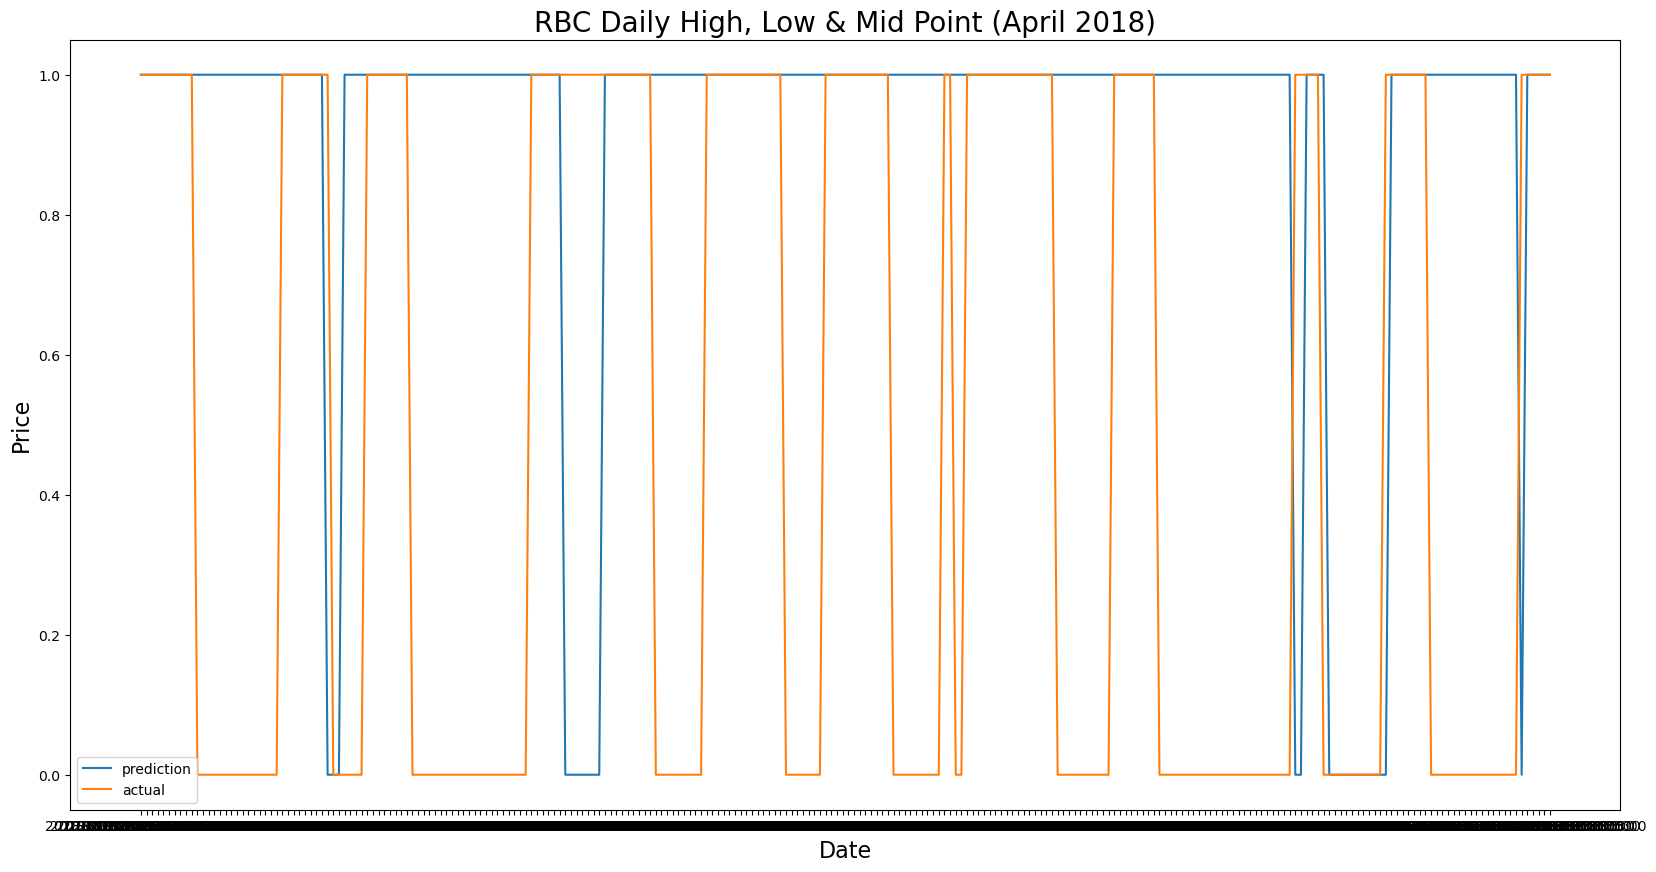

In [14]:
# Plot daily returns of all portfolios
fig = plt.figure(figsize=(20,10))

plt.plot(df_prediction_test)
plt.title("RBC Daily High, Low & Mid Point (April 2018)", fontsize = 20)
plt.ylabel("Price", fontsize = 16)
plt.xlabel("Date", fontsize = 16)
plt.legend(df_prediction_test.columns)
#plt.grid()

plt.show()

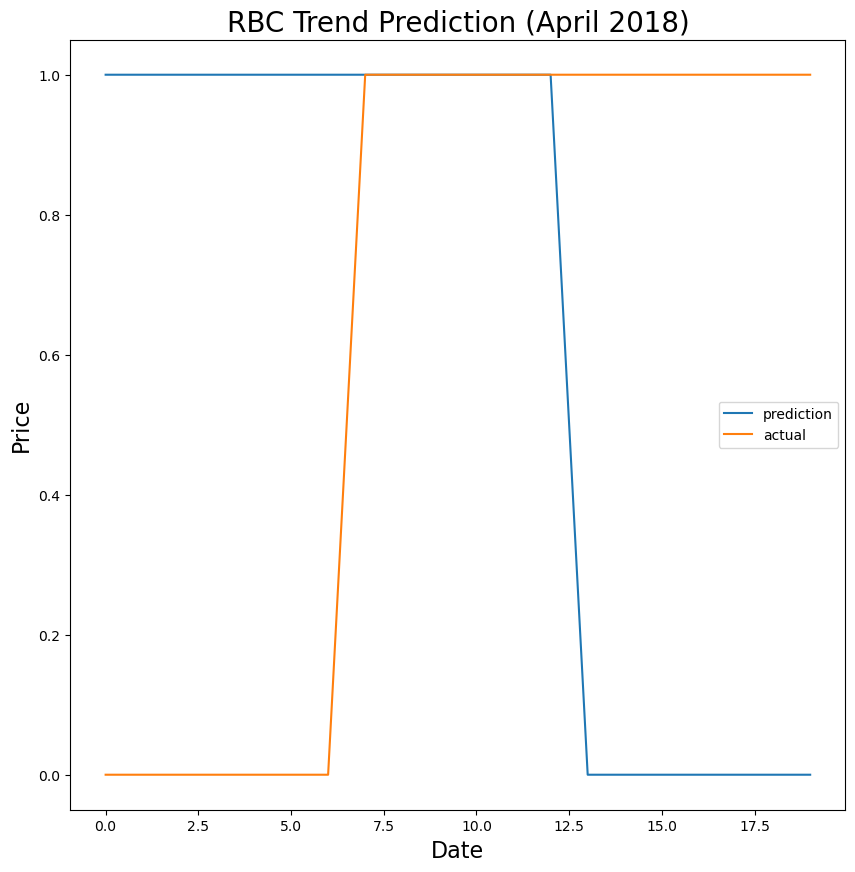

In [15]:
# Data April 2018
df_plt2 = df_prediction_test.loc['2018-04-01':'2018-04-30']
df_plt2 = df_plt2.reset_index()
df_plt2 = df_plt2.drop(columns = ['Date'])
df_plt2.columns

# Plot daily returns of all portfolios
fig = plt.figure(figsize=(10,10))

plt.plot(df_plt2)
plt.title("RBC Trend Prediction (April 2018)", fontsize = 20)
plt.ylabel("Price", fontsize = 16)
plt.xlabel("Date", fontsize = 16)
plt.legend(df_plt2.columns)
#plt.grid()

plt.show()

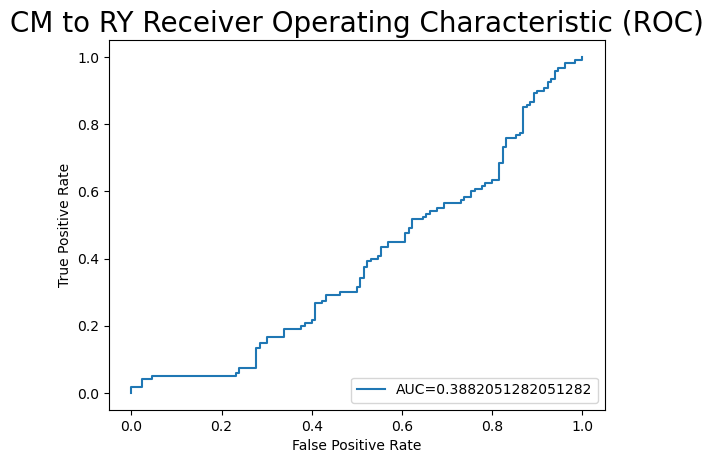

In [16]:
X_test = X_Test
y_test = Y_Test
y_pred_proba = predictions_test
log_regression = classifier

#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title("CM to RY Receiver Operating Characteristic (ROC)", fontsize = 20)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()